# Formula 1 World Championship (1950 - 2024)

students: Marat Zhanel and Borambaev Duman

**Source**:https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=results.csv



**Brief description of the fields**
* **resultId**:Id
* **raceId**:Id of race
* **driverId**:Id of driver
* **constructorId**:Id of constructor:Id of constructor
* **number**:Car number
* **grid**:Position in starting grid
* **position**:Final position
* **positionText**:Final position in text
* **positionOrder**:Final rank
* **points**:Points
* **laps**:Number of laps completed by the driver.
time:Total race time in a formatted string (e.g., hh:mm:ss.ms).
* **milliseconds**:Time in milliseconds
* **fastestLap**:Lap number of fastest lap
* **rank**:Rank of fastest lap
* **fastestLapTime**:Lap time of fastest lap
* **fastestLapSpeed**:Top speed of fastest lap
* **statusId**:Identifier describing the driver’s race status (e.g., finished, retired, disqualified).


# Tasks

imports


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import plot_tree


For widgets


In [115]:
#!pip install ipywidgets


Data preparing

In [116]:
upload_main = widgets.FileUpload(accept='.csv', multiple=False)
display(widgets.Label("results.csv"), upload_main)

def load_main_data():
    uploaded_file = list(upload_main.value.values())[0]['content']
    return pd.read_csv(pd.io.common.BytesIO(uploaded_file))



Label(value='results.csv')

FileUpload(value={}, accept='.csv', description='Upload')

Linear regression y = k*x+b

In [117]:
#linear prediction
def predict(X, w, b):
    return X * w + b

Gradient descent(batch)
* 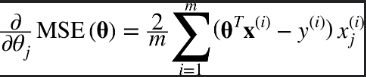

* 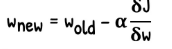

In [118]:
def train_linear_regression(X, y, lr, epochs):
    # Get the number of features from input data
    n_features = X.shape[1]

    # Initialize weights and bias to zeros
    w = np.zeros(n_features)
    b = 0.0

    # List to store loss at each epoch
    losses = []

    # Loop over the number of epochs for training
    for _ in range(epochs):
        # Compute predictions using current weights and bias
        y_hat = X @ w + b

        # Calculate the error between true values and predictions
        error = y - y_hat

        # Compute gradient of loss with respect to weights
        dw = (-2 / len(y)) * (X.T @ error)

        # Compute gradient of loss with respect to bias
        db = (-2 / len(y)) * np.sum(error)

        # Update weights using gradient descent
        w -= lr * dw

        # Update bias using gradient descent
        b -= lr * db

        # Calculate and store mean squared error for this epoch
        losses.append(mean_squared_error(y, y_hat))

    # Return the trained weights, bias, and list of losses
    return w, b, losses


Attempt to optimize linear regression
 * Takes previous steps into account

 * Accelerates movement in one direction

In [119]:
def train_linear_regression_momentum(X, y, lr, epochs, gamma=0.9):

    n_features = X.shape[1]
    w = np.zeros(n_features)  # initialize weights
    b = 0.0                   # initialize bias
    losses = []

    # initialize velocity(previous gradients) for weights and bias (momentum terms)
    vw = np.zeros(n_features)
    vb = 0.0

    for _ in range(epochs):
        # compute predictions
        y_hat = X @ w + b
        error = y - y_hat

        # compute gradients
        dw = (-2 / len(y)) * (X.T @ error)
        db = (-2 / len(y)) * np.sum(error)

        # velocity is updated as a combination of previous velocity and current gradient
        # gamma controls how much of the previous velocity is retained
        vw = gamma * vw + lr * dw
        vb = gamma * vb + lr * db

        # update parameters using velocity
        w -= vw
        b -= vb

        # store mean squared error for this epoch
        losses.append(np.mean(error ** 2))

    return w, b, losses


Logistic regression
* 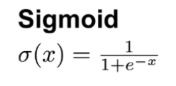
* 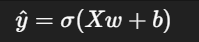 X @ w — Matrix multiplication of features by weights.
* 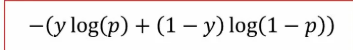
* 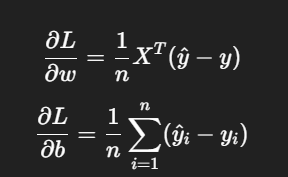
* 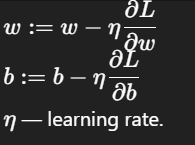

In [120]:
def sigmoid(z):
    # Apply the sigmoid function to convert input to probability between 0 and 1
    return 1 / (1 + np.exp(-z))

def predict_logistic(X, w, b):
    # Compute linear combination and apply sigmoid to get predicted probabilities
    return sigmoid(X @ w + b)

def log_loss(y, y_hat):
    # Compute logistic loss (cross-entropy) with a small epsilon to avoid log(0)
    eps = 1e-9
    return -np.mean(y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps))

def train_logistic_regression_balanced(X, y, lr, epochs):
    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0
    losses = []

    # Find unique classes and total number of examples
    classes = np.unique(y)
    n_total = len(y)

    # Compute class weights to handle imbalanced classes
    # weight = total samples / (2 * count of this class)
    class_weights = {c: n_total / (2 * np.sum(y == c)) for c in classes}

    # Create an array of weights corresponding to each sample
    w_class = np.array([class_weights[yi] for yi in y])

    for _ in range(epochs):
        # Predict probabilities using current weights and bias
        y_hat = predict_logistic(X, w, b)

        # Compute gradients weighted by class to balance the dataset
        dw = X.T @ (w_class * (y_hat - y)) / len(y)
        db = np.mean(w_class * (y_hat - y))

        # Update weights and bias using gradient descent
        w -= lr * dw
        b -= lr * db

        # Compute weighted log-loss and store for monitoring
        eps = 1e-9
        loss = -np.mean(w_class * (y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps)))
        losses.append(loss)

    # Return trained weights, bias, and loss history
    return w, b, losses


Widgets

Dropdown(description='Model:', options=('Linear Regression', 'Linear Regression (Momentum)', 'Logistic Regress…

FloatSlider(value=0.01, description='LR', max=0.1, min=0.0001, step=0.001)

IntSlider(value=100, description='Epochs', max=500, min=10, step=10)

Button(description='Train', style=ButtonStyle())

Coefficients: [-3.24951762  0.98907546  0.32188834]
Intercept: 3.6743316158949426
MSE: 27.3584
RMSE: 5.2305
R2: 0.3616


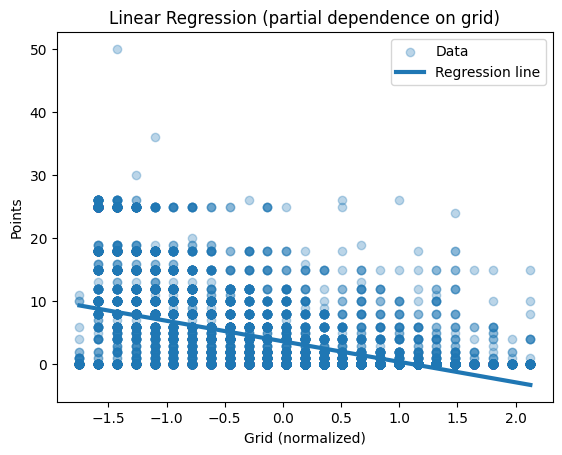

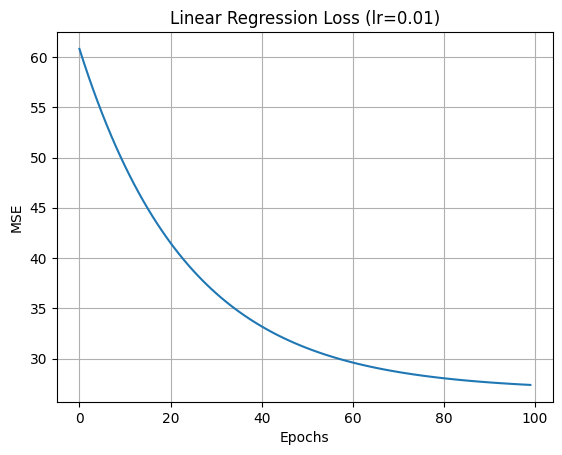

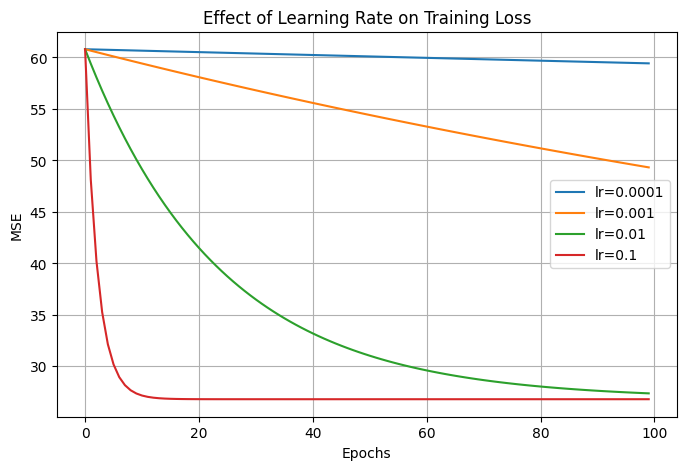

Coefficients: [-3.73094225  1.00849517  0.24970895]
Intercept: 4.2182137594295
MSE: 26.8116
RMSE: 5.1780
R2: 0.3744


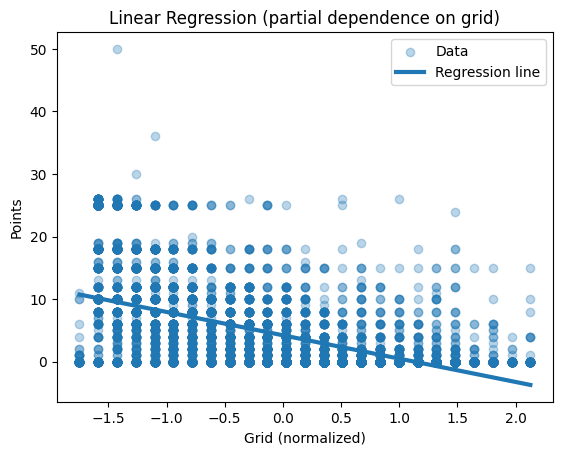

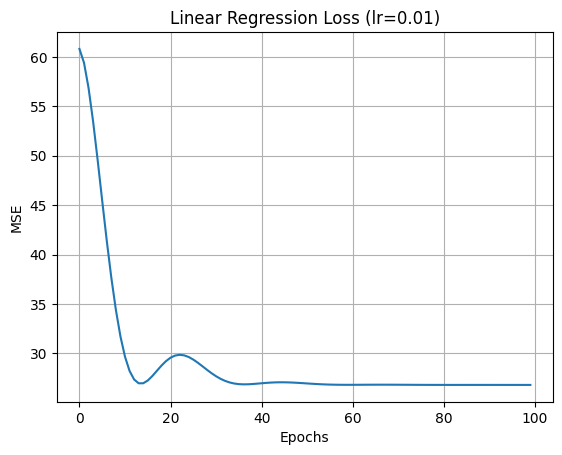

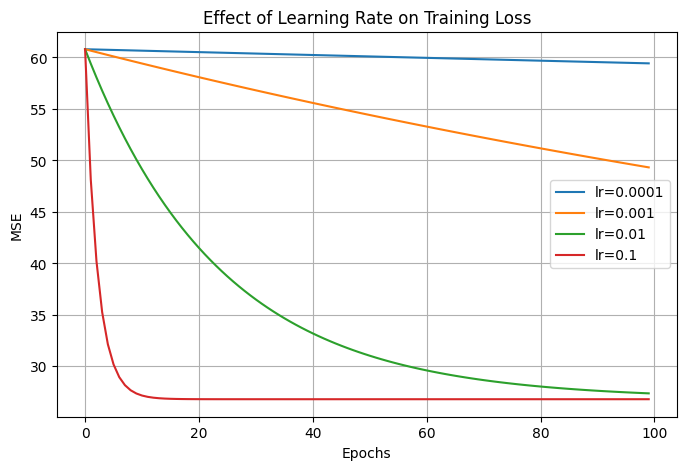

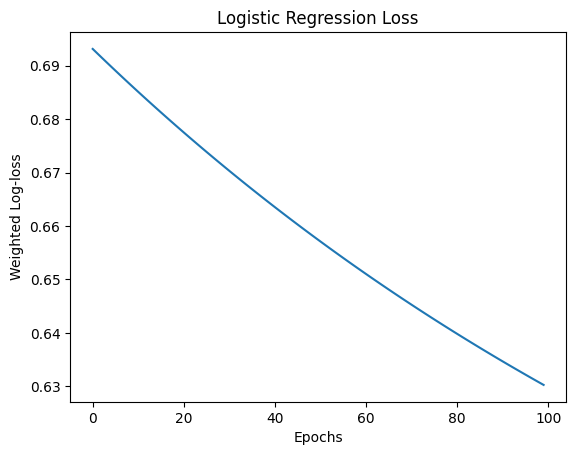

Coefficients: [ 0.2062921  -0.12503918 -0.06980224]
Intercept: -0.000260819917738889
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1284
           1       0.73      0.75      0.74      1192

    accuracy                           0.74      2476
   macro avg       0.74      0.74      0.74      2476
weighted avg       0.75      0.74      0.74      2476

Confusion Matrix:
 [[954 330]
 [302 890]]
ROC AUC: 0.8170500637688433


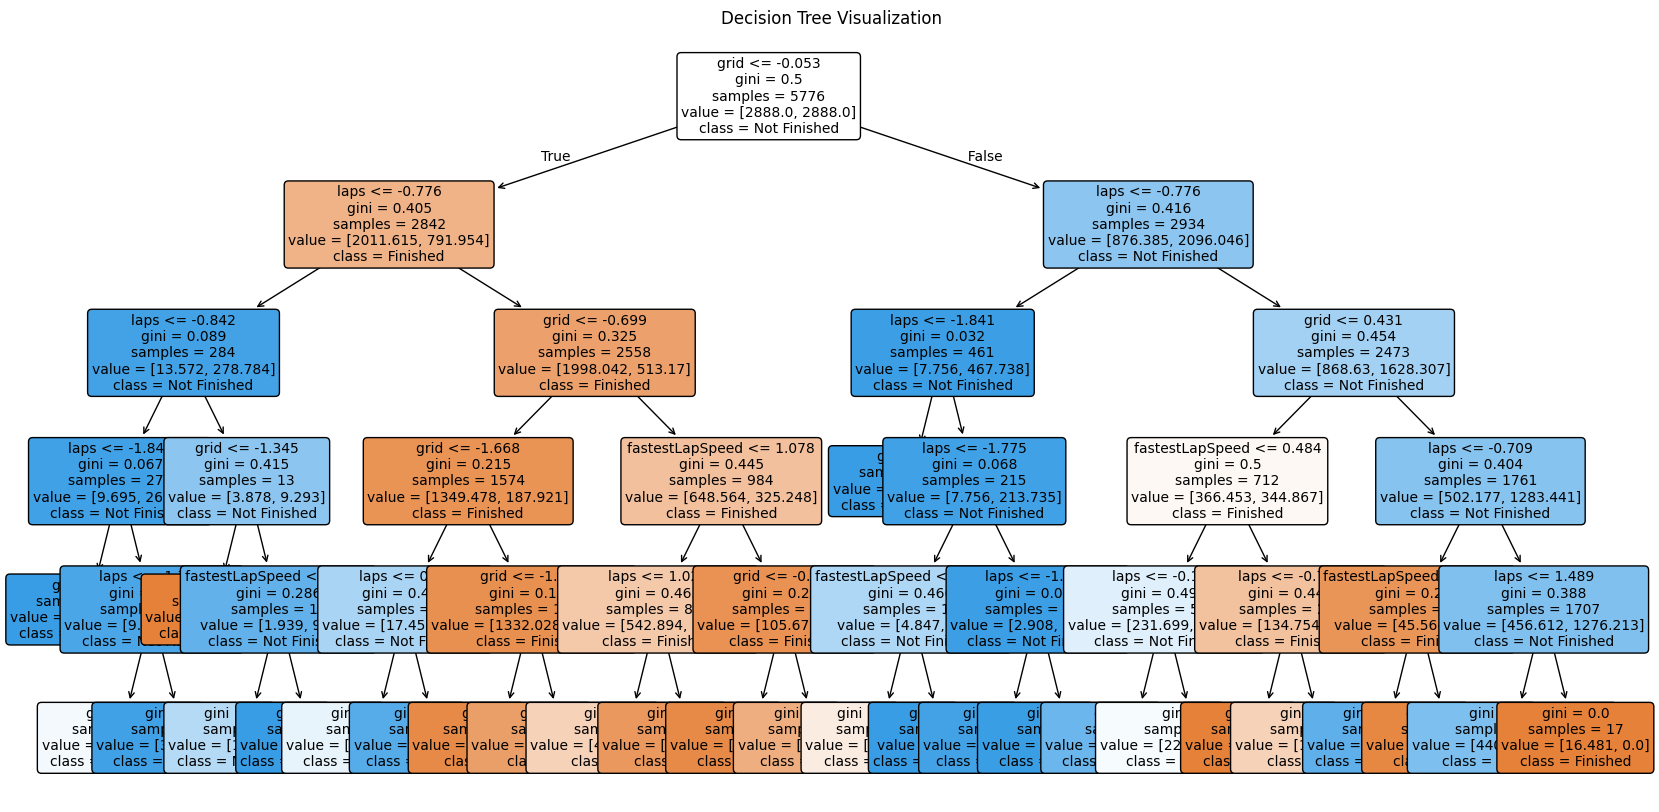

Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1284
           1       0.75      0.80      0.77      1192

    accuracy                           0.77      2476
   macro avg       0.77      0.77      0.77      2476
weighted avg       0.77      0.77      0.77      2476

Confusion Matrix:
 [[961 323]
 [242 950]]
ROC AUC: 0.8396174392105209


In [121]:
import ipywidgets as widgets
from IPython.display import display

# Dropdown with "Linear Regression (Adam)" added
model_selector = widgets.Dropdown(
    options=['Linear Regression', 'Linear Regression (Momentum)', 'Logistic Regression', 'Decision Tree'],
    description='Model:'
)

lr_slider = widgets.FloatSlider(
    value=0.01, min=0.0001, max=0.1, step=0.001, description='LR'
)

epochs_slider = widgets.IntSlider(
    value=100, min=10, max=500, step=10, description='Epochs'
)

run_button = widgets.Button(description='Train')

display(model_selector, lr_slider, epochs_slider, run_button)


In [122]:
def run_model(b):
    model_name = model_selector.value
    lr = lr_slider.value
    epochs = epochs_slider.value

    # =========================
    # Linear Regression (Points Prediction)
    # =========================
    if model_name in ['Linear Regression', 'Linear Regression (Momentum)']:
        df = load_main_data()

        # Select relevant columns
        df = df[['grid', 'laps', 'fastestLapSpeed', 'points']].copy()
        df = df.replace({'\\N': np.nan})

        # Convert columns to numeric
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # Drop rows with missing values
        df = df.dropna()

        if df.empty:
            print("No data available for training!")
            return

        # Target and features
        y = df['points'].values
        X = df[['grid', 'laps', 'fastestLapSpeed']].values

        # Feature normalization
        X_mean, X_std = X.mean(axis=0), X.std(axis=0)
        X_std[X_std == 0] = 1
        X = (X - X_mean) / X_std

        # Training
        if model_name == 'Linear Regression':
            # Standard gradient descent
            w, b, losses = train_linear_regression(X, y, lr, epochs)
        else:
            # Adam optimizer for faster convergence and stability
            w, b, losses = train_linear_regression_momentum(X, y, lr, epochs)

        # Prediction
        y_hat = X @ w + b

        # Metrics
        mse = mean_squared_error(y, y_hat)
        rmse = np.sqrt(mse)
        r2 = r2_score(y, y_hat)

        print("Coefficients:", w)
        print("Intercept:", b)
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R2: {r2:.4f}")

        # Plot loss over epochs
      # Create smooth grid values
        grid_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

        # Fix other features at mean (0 after normalization)
        laps_mean = 0
        speed_mean = 0

        X_line = np.column_stack([
            grid_vals,
            np.full_like(grid_vals, laps_mean),
            np.full_like(grid_vals, speed_mean)
        ])

        y_line = X_line @ w + b

        plt.figure()
        plt.scatter(X[:, 0], y, alpha=0.3, label='Data')
        plt.plot(grid_vals, y_line, linewidth=3, label='Regression line')
        plt.xlabel("Grid (normalized)")
        plt.ylabel("Points")
        plt.title("Linear Regression (partial dependence on grid)")
        plt.legend()
        plt.show()
        plt.figure()
        plt.plot(losses)
        plt.xlabel("Epochs")
        plt.ylabel("MSE")
        plt.title(f"Linear Regression Loss (lr={lr})")
        plt.grid(True)
        plt.show()
        learning_rates = [0.0001, 0.001, 0.01, 0.1]
        epochs = 100

        plt.figure(figsize=(8, 5))

        for lr_test in learning_rates:
            w, b, losses = train_linear_regression(X, y, lr=lr_test, epochs=epochs)
            plt.plot(losses, label=f"lr={lr_test}")

        plt.xlabel("Epochs")
        plt.ylabel("MSE")
        plt.title("Effect of Learning Rate on Training Loss")
        plt.legend()
        plt.grid(True)
        plt.show()



    # =========================
    # Classification
    # =========================
    else:
        df = load_main_data()
        df = df[['grid', 'laps', 'fastestLapSpeed', 'statusId']].copy()
        df = df.replace({'\\N': np.nan}).dropna()

        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # Binary target: 0 = Finished, 1 = Not Finished
        df['target'] = df['statusId'].apply(lambda x: 0 if x == 1 else 1)

        X = df[['grid', 'laps', 'fastestLapSpeed']].values
        y = df['target'].values

        # Normalize features
        X = (X - X.mean(axis=0)) / X.std(axis=0)

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42
        )

        y_pred = None
        y_prob = None

        if model_name == 'Decision Tree':
            model = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1]

            # ===== TREE VISUALIZATION =====
            plt.figure(figsize=(20, 10))
            plot_tree(
                model,
                feature_names=['grid', 'laps', 'fastestLapSpeed'],
                class_names=['Finished', 'Not Finished'],
                filled=True,
                rounded=True,
                fontsize=10
            )
            plt.title("Decision Tree Visualization")
            plt.show()

        elif model_name == 'Logistic Regression':
            w, b0, losses = train_logistic_regression_balanced(X_train, y_train, lr, epochs)
            y_prob = predict_logistic(X_test, w, b0)
            y_pred = (y_prob >= 0.5).astype(int)

            # Plot loss
            plt.figure()
            plt.plot(losses)
            plt.xlabel("Epochs")
            plt.ylabel("Weighted Log-loss")
            plt.title("Logistic Regression Loss")
            plt.show()

            print(f"Coefficients: {w}")
            print(f"Intercept: {b0}")

        # Metrics
        if y_pred is not None and y_prob is not None:
            acc = accuracy_score(y_test, y_pred)
            print(f"Accuracy: {acc:.2f}")
            print(classification_report(y_test, y_pred, zero_division=0))
            print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
            print("ROC AUC:", roc_auc_score(y_test, y_prob))


In [123]:
run_button.on_click(run_model)

# Conclusion on linear regression
 I predict a driver’s **points** based on their starting position (`grid`), number of laps (`laps`), and fastest lap speed (`fastestLapSpeed`).

The results vary due to the optimization method: standard gradient descent converges slowly and can “oscillate” on noisy data, while Adam sometimes overestimates gradients on a small dataset, which worsens R².

Using **Momentum** helped me accelerate convergence and stabilize training. Thanks to it, the coefficients became more predictable, and the R² metric improved on my dataset.


# Conclusion on classification
For classification, I predict whether a driver finished the race or not (Finished vs Not Finished) based on grid, laps, and fastestLapSpeed.

The Decision Tree performed better than Logistic Regression because:

It can capture nonlinear relationships between features and the target, which Logistic Regression cannot.

It handles interactions between variables automatically, like how starting position and number of laps together affect the outcome.

It is less sensitive to feature scaling and noise, making it more robust on this dataset.

Overall, the Decision Tree gave higher accuracy and ROC AUC, making it a better choice for this classification task.